In [2]:
import time
start=time.time()
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Conv2D,Flatten,MaxPooling2D,Activation,Dense,Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras import regularizers

from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [3]:
cifar=keras.datasets.cifar10
(train_x,train_y),(test_x,test_y)=cifar.load_data()

In [4]:
train_x=train_x/255
test_x=test_x/255
train_x.shape

(50000, 32, 32, 3)

In [5]:
type(train_x)

numpy.ndarray

In [6]:
train_y

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

<function matplotlib.pyplot.show(*args, **kw)>

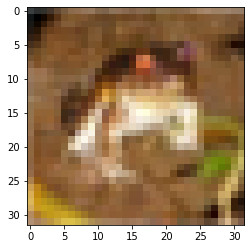

In [4]:
plt.imshow(train_x[0])
plt.show

In [5]:
model=Sequential()
model.add(Conv2D(64,(3,3),input_shape=(32,32,3),activity_regularizer=regularizers.l2(0.001)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3),activity_regularizer=regularizers.l2(0.001)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3),activity_regularizer=regularizers.l2(0.001)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten(input_shape=(32,32,3)))

model.add(Dense(164,activity_regularizer=regularizers.l2(0.001)))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(Dense(128,activity_regularizer=regularizers.l2(0.001)))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(Dense(256,activity_regularizer=regularizers.l2(0.001)))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(Dense(10))
model.add(Activation('softmax'))

In [6]:
classes=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']


In [7]:
model.compile(optimizer='adam',metrics=['accuracy'],loss='sparse_categorical_crossentropy')
history=model.fit(train_x,train_y,epochs=10,batch_size=128,validation_data=(test_x,test_y))

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 95s 2ms/sample - loss: 3.7388 - accuracy: 0.3862 - val_loss: 2.8555 - val_accuracy: 0.1098
Epoch 2/10
50000/50000 [==============================] - 39s 784us/sample - loss: 2.3628 - accuracy: 0.4886 - val_loss: 2.0110 - val_accuracy: 0.4338
Epoch 3/10
50000/50000 [==============================] - 40s 792us/sample - loss: 1.9206 - accuracy: 0.5508 - val_loss: 1.8134 - val_accuracy: 0.5328
Epoch 4/10
50000/50000 [==============================] - 39s 788us/sample - loss: 1.6324 - accuracy: 0.6015 - val_loss: 1.8053 - val_accuracy: 0.5324
Epoch 5/10
50000/50000 [==============================] - 39s 786us/sample - loss: 1.4044 - accuracy: 0.6464 - val_loss: 1.9231 - val_accuracy: 0.4460
Epoch 6/10
50000/50000 [==============================] - 39s 787us/sample - loss: 1.2691 - accuracy: 0.6729 - val_loss: 1.7854 - val_accuracy: 0.5223
Epoch 7/10
50000/50000 [======================

In [8]:
model.save('cifar10.model')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: cifar10.model\assets


In [9]:
test_loss,test_acc=model.evaluate(test_x,test_y,verbose=0)

In [10]:
model1=keras.models.load_model('cifar10.model')
predictions=model1.predict(test_x)
classes[np.argmax(predictions[1])]

'automobile'

In [11]:
end=time.time()
print(end-start)

615.5097374916077
